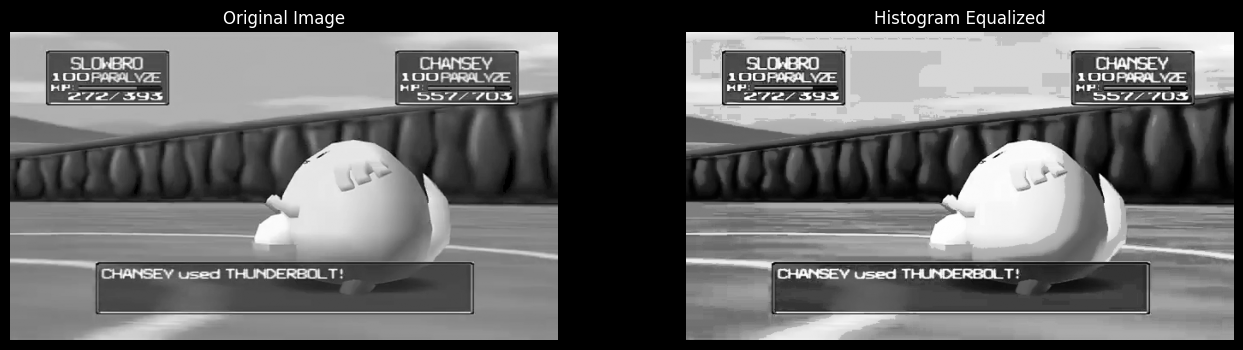

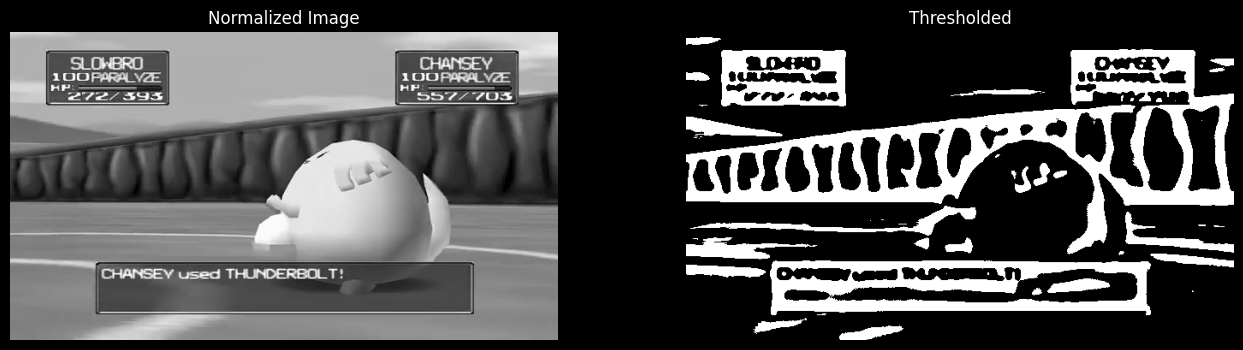

In [3]:
%matplotlib inline
import cv2
import matplotlib
# matplotlib.use('TkAgg')  # Use TkAgg backend for interactive plotting

import matplotlib.pyplot as plt
import os

image_file = 'C:/Users/tmela/data/battle4/frame_015642.png'
if not os.path.exists(image_file):
    print(f"Image file {image_file} does not exist.")
    # If the image file does not exist, use a different path
    # Uncomment the line below and set the correct path to your image
    # image_file = '/path/to/your/image.png'

# Read the image in grayscale
img = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)

# Gaussian blur
blurred = cv2.GaussianBlur(img, (11, 11), 0)

# Perform histogram equalization
equalized_img = cv2.equalizeHist(img)

# Inverse threshold on the image
thresholded_img = cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY_INV,55,5)
# thresholded_img = cv2.threshold(equalized_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

normalized_img = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

# Display original and equalized images
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Histogram Equalized')
plt.imshow(equalized_img, cmap='gray')
plt.axis('off')

plt.figure(figsize=(16,4))

plt.subplot(1,2,2)
plt.title('Thresholded')
plt.imshow(thresholded_img, cmap='gray')
plt.axis('off')
plt.subplot(1,2, 1)
plt.title('Normalized Image')
plt.imshow(normalized_img, cmap='gray')
plt.axis('off')

plt.show()

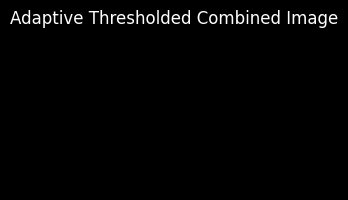

In [4]:
# Experiment: Can the adpative threshold and inverse threshold be combined?
thresholded_img = cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,55,5 )
inv_thresholded_img = cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY_INV,55,5)
combined = cv2.bitwise_and(thresholded_img, inv_thresholded_img)
# Display the combined thresholded image
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.title('Adaptive Thresholded Combined Image')
plt.imshow(combined, cmap='gray')
plt.axis("off")
plt.show()

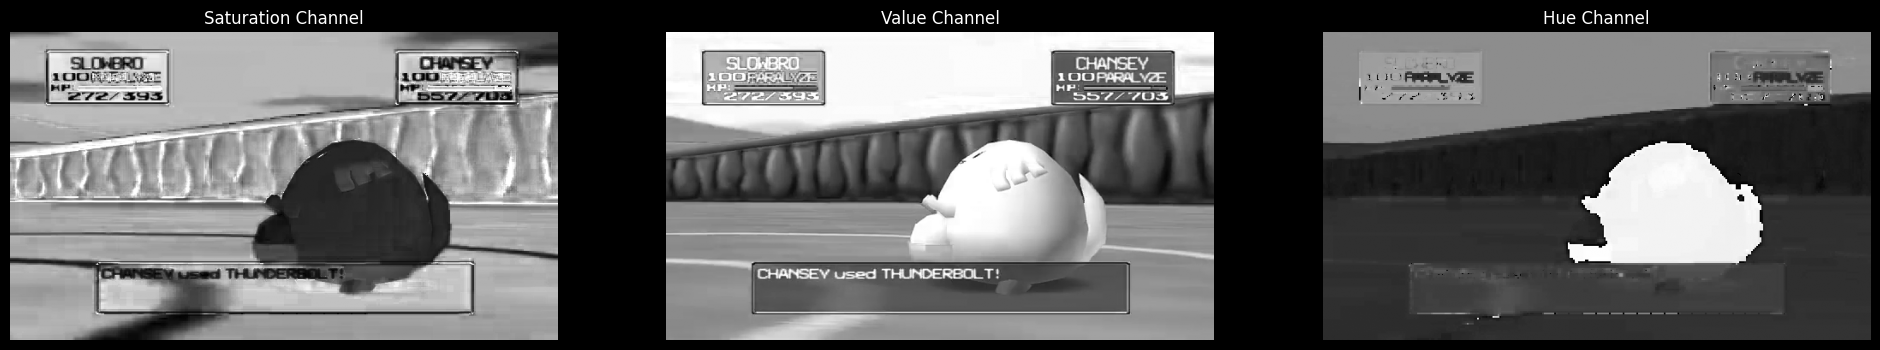

In [5]:
img_color = cv2.imread(image_file, cv2.IMREAD_COLOR)
# Split saturation and value channels
hsv = cv2.cvtColor(img_color, cv2.COLOR_BGR2HSV)
saturation = hsv[:, :, 1]
value = hsv[:, :, 2]

# Display saturation and value channels
plt.figure(figsize=(24, 4))
plt.subplot(1, 3, 1)
plt.title('Saturation Channel')
plt.imshow(saturation, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Value Channel')
plt.imshow(value, cmap='gray')
plt.axis('off')

# Display hue channel
hue = hsv[:, :, 0]
plt.subplot(1,3,3)
plt.title('Hue Channel')
plt.imshow(hue, cmap='gray')
plt.axis('off')

plt.show()

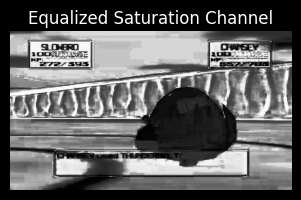

In [6]:
# Apply histogram equalization on the saturation channel
saturation_equalized = cv2.equalizeHist(saturation)


plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Equalized Saturation Channel')
plt.imshow(saturation_equalized, cmap='gray')
plt.axis('off')
plt.show()
                                               

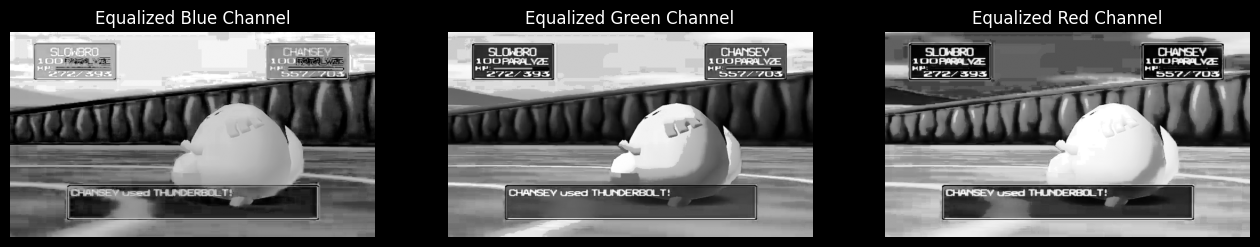

In [7]:
# Histogram equlization on the color image?
b_equalized = cv2.equalizeHist(img_color[:,:,0]) # Equalize blue channel
g_equalized = cv2.equalizeHist(img_color[:,:,1]) # Equalize green channel
r_equalized = cv2.equalizeHist(img_color[:,:,2])

plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
plt.title('Equalized Blue Channel')
plt.imshow(b_equalized, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title('Equalized Green Channel')
plt.imshow(g_equalized, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title('Equalized Red Channel')
plt.imshow(r_equalized, cmap='gray')
plt.axis('off')
plt.show()

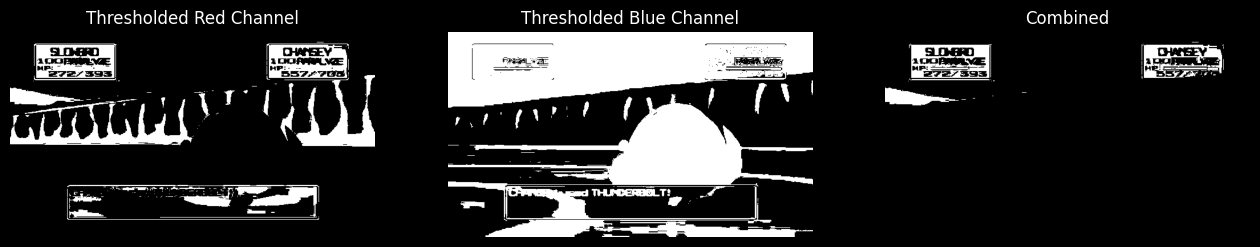

In [8]:
# Experiment: Inverse thresholding of Red value
r_thresholded = cv2.threshold(r_equalized, 40, 255, cv2.THRESH_BINARY_INV)[1]
b_thresholded = cv2.threshold(b_equalized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

combined = cv2.bitwise_and(r_thresholded, b_thresholded)

plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
plt.title('Thresholded Red Channel')
plt.imshow(r_thresholded, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title('Thresholded Blue Channel')
plt.imshow(b_thresholded, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title('Combined')
plt.imshow(combined, cmap='gray')
plt.axis('off')
plt.show()

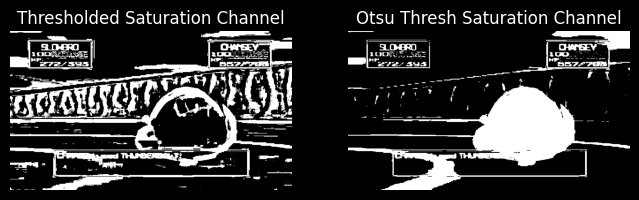

In [9]:
# Apply adaptive thresholding to the saturation channel
saturation_thresholded = cv2.adaptiveThreshold(saturation, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                                cv2.THRESH_BINARY_INV, 55, 5)   
# Apply OTSU thresholding 
saturation_otsu = cv2.threshold(saturation, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
# Display the thresholded saturation channel
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.title('Thresholded Saturation Channel')
plt.imshow(saturation_thresholded, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Otsu Thresh Saturation Channel')
plt.imshow(saturation_otsu, cmap='gray')
plt.axis('off')
plt.show()

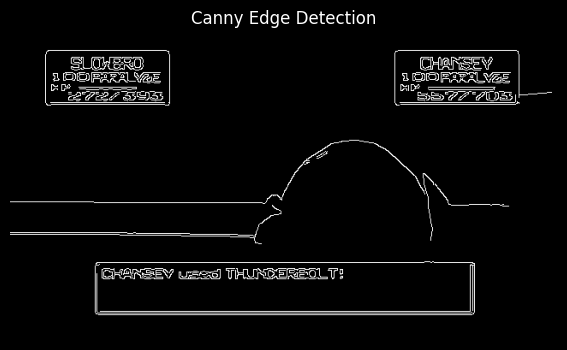

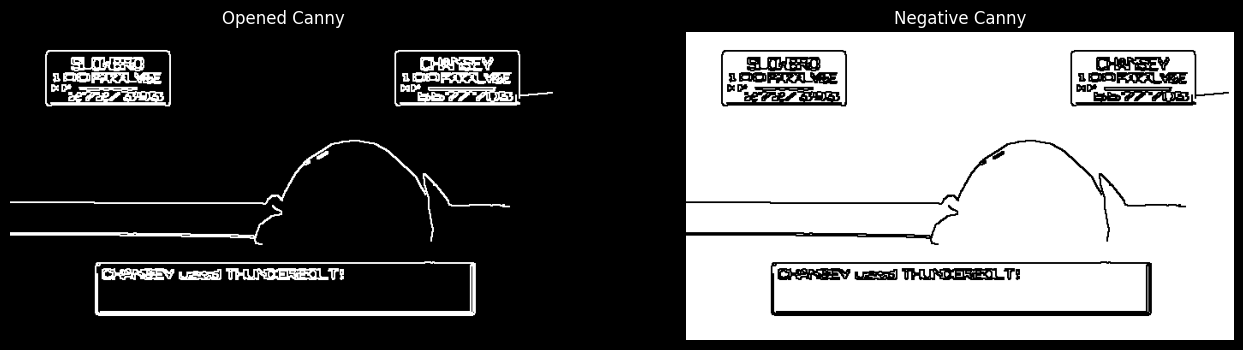

In [10]:

# Perform Canny edge detection on the original grayscale image
edges = cv2.Canny(normalized_img, threshold1=200, threshold2=700)
# edges = cv2.Canny(r_thresholded, threshold1=200, threshold2=700)

# Display the edges
plt.figure(figsize=(16,4))
plt.subplot(1,1, 1)
plt.title('Canny Edge Detection')
plt.imshow(edges, cmap='gray')
plt.axis('off')


# Add morphological closing
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
opened = cv2.morphologyEx(edges, cv2.MORPH_OPEN, kernel)
# closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
closed = cv2.dilate(edges, kernel, iterations=1)
negative_edges = 255 - closed
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.title('Opened Canny')
plt.imshow(closed, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Negative Canny')
plt.imshow(negative_edges, cmap='gray')
plt.axis('off')
plt.show()

Number of contours found: 5


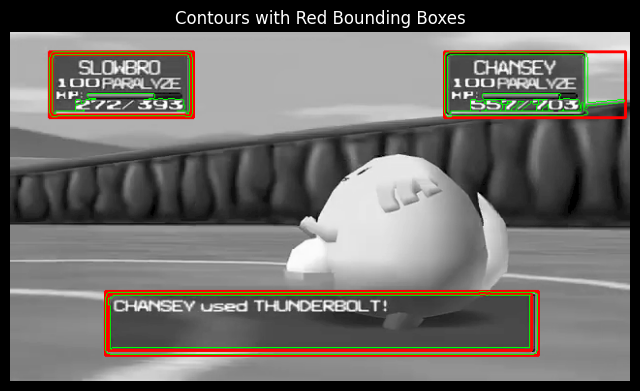

In [11]:
# Find contours in the edges image
# contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_L1)
contours, _ = cv2.findContours(negative_edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Convert the original grayscale image to BGR color
img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

img_area = img_color.shape[0] * img_color.shape[1]
contours_filtered = [cnt for cnt in contours if cv2.contourArea(cnt) > 0.01*img_area and cv2.contourArea(cnt) < 0.5*img_area]  # Filter small contours
print(f"Number of contours found: {len(contours_filtered)}")

# Draw red bounding boxes around each contour
for cnt in contours_filtered:
    x, y, w, h = cv2.boundingRect(cnt)
    if w > 10 and h > 10:
        cv2.rectangle(img_color, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Red color in BGR
cv2.drawContours(img_color, contours_filtered, -1, (0, 255, 0), 1)  # Draw contours in green

# Display the result
plt.figure(figsize=(8, 8))
plt.title('Contours with Red Bounding Boxes')
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Found HP box at (43, 23) with width 143 and height 62


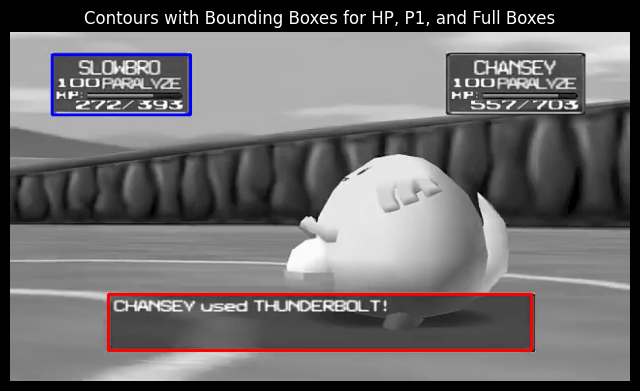

In [12]:
HP_BOX_RATIO = 2.35 # Width to height ratio
P1_BOX_RATIO = 1.68
FULL_BOX_RATIO = 1.0 # With pfp and 1P/2P
STATUS_BOX_RATIO = 7.4 # With status bar

# Convert the original grayscale image to BGR color
img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Filter out contours with similar locations and sizes
unique_contours = []
for cnt in contours_filtered:
    x, y, w, h = cv2.boundingRect(cnt)
    duplicate = False
    for unique_cnt in unique_contours:
        ux, uy, uw, uh = cv2.boundingRect(unique_cnt)
        # Get IoU (Intersection over Union) to check if the contours overlap significantly
        intersection_area = max(0, min(x + w, ux + uw) - max(x, ux)) * max(0, min(y + h, uy + uh) - max(y, uy))
        union_area = (w * h) + (uw * uh) - intersection_area
        iou = intersection_area / union_area if union_area > 0 else 0
        if iou > 0.3:  # If IoU is greater than 0.5, consider it a duplicate
            duplicate = True
            break
    if not duplicate:
        unique_contours.append(cnt)



for cnt in unique_contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ratio = w / h
    if ratio > HP_BOX_RATIO * 0.9 and ratio < HP_BOX_RATIO * 1.1:
        print(f"Found HP box at ({x}, {y}) with width {w} and height {h}")
        # Draw a rectangle around the HP box
        cv2.rectangle(img_color, (x, y), (x + w, y + h), (255, 0, 0), 2) # Blue color in BGR
    elif ratio > P1_BOX_RATIO * 0.9 and ratio < P1_BOX_RATIO * 1.1:
        print(f"Found P1 box at ({x}, {y}) with width {w} and height {h}")
        # Draw a rectangle around the P1 box
        cv2.rectangle(img_color, (x, y), (x + w, y + h), (0, 255, 0), 2) # Green color in BGR
    elif ratio > FULL_BOX_RATIO * 0.9 and ratio < FULL_BOX_RATIO * 1.1:
        # Draw a rectangle around the full box
        cv2.rectangle(img_color, (x, y), (x + w, y + h), (0, 255, 255), 2) # Yellow color in BGR
        print(f"Found Full box at ({x}, {y}) with width {w} and height {h}")
    elif ratio > STATUS_BOX_RATIO * 0.9 and ratio < STATUS_BOX_RATIO * 1.1:
        # Draw a rectangle around the status box
        cv2.rectangle(img_color, (x, y), (x + w, y + h), (0, 0, 255), 2) # Red color in BGR

# Display the result
plt.figure(figsize=(8, 8))
plt.title('Contours with Bounding Boxes for HP, P1, and Full Boxes')
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [13]:
# Next Steps:
# - Compare found rectangles against ground truth dimensions
# - If rectangles reveal too many false positives, try using contours directly
#    - Contours can be filtered by area, perimeter, or other properties
#    - Use cv2.contourArea() to filter contours based on area
#    - Compare contour against ground truth composite rectangle dimensions

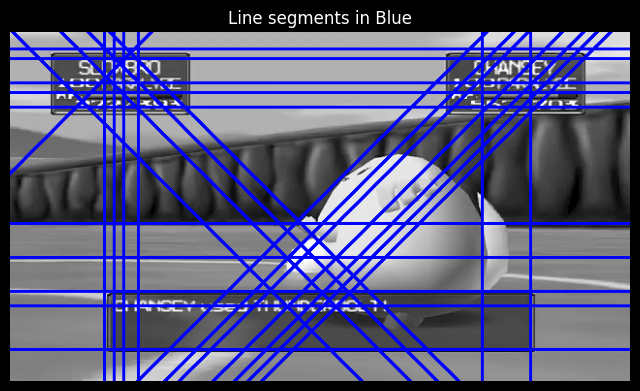

In [14]:
import numpy as np

# Perform Hough Line Transform to detect lines in the edges image
lines = cv2.HoughLines(edges, 5, np.pi / 4, threshold=150)
img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)  # Convert to BGR for drawing lines

if lines is not None:
    # Draw the detected lines on the original image
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(img_color, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Blue color in BGR

# Display the result
plt.figure(figsize=(8, 8))
plt.title('Line segments in Blue')
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Current HoughLinesP parameters analysis:
Theta resolution: np.pi / 4 = 0.7854 radians = 45.0 degrees
This means we only check angles at multiples of 45°: 0°, 45°, 90°, 135°, etc.
Vertical lines are at 90° (π/2 radians)

Trying with finer theta resolution (np.pi / 180 = 1 degree resolution):
Found 122 lines with finer resolution
Horizontal lines (green): 96
Vertical lines (blue): 11
Diagonal lines (red): 15


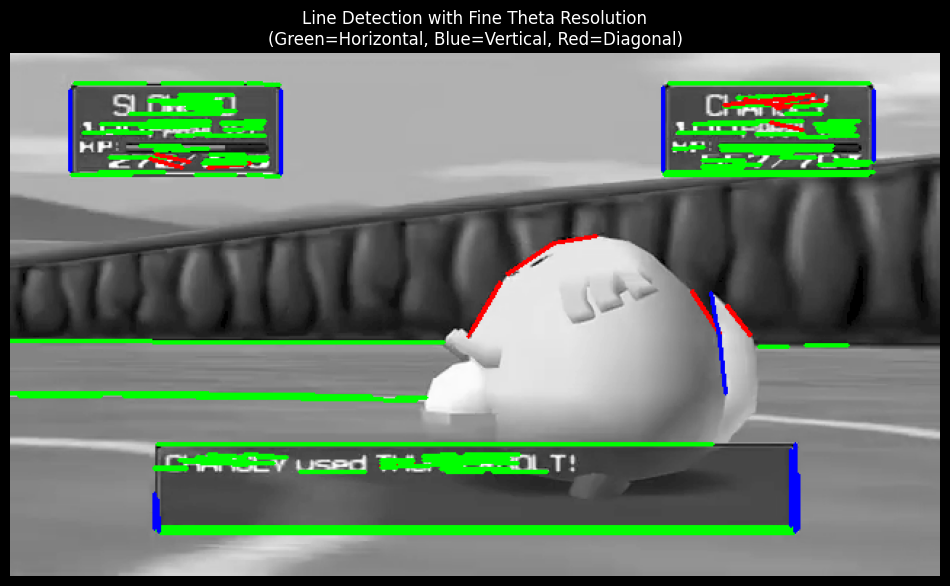

In [15]:
# Let's analyze why HoughLinesP doesn't find vertical lines
print("Current HoughLinesP parameters analysis:")
print(f"Theta resolution: np.pi / 4 = {np.pi / 4:.4f} radians = {np.degrees(np.pi / 4):.1f} degrees")
print("This means we only check angles at multiples of 45°: 0°, 45°, 90°, 135°, etc.")
print("Vertical lines are at 90° (π/2 radians)")
print()

# Let's try with better theta resolution for detecting all line orientations
print("Trying with finer theta resolution (np.pi / 180 = 1 degree resolution):")

# Use finer theta resolution to detect lines at all angles
lines_fine = cv2.HoughLinesP(edges, 1, np.pi / 180, 10, minLineLength=20, maxLineGap=5)
img_color_fine = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

if lines_fine is not None:
    print(f"Found {len(lines_fine)} lines with finer resolution")
    
    # Categorize lines by orientation
    horizontal_lines = []
    vertical_lines = []
    diagonal_lines = []
    
    for line in lines_fine:
        x1, y1, x2, y2 = line[0]
        
        # Calculate angle
        if x2 - x1 != 0:
            angle = np.arctan((y2 - y1) / (x2 - x1))
            angle_degrees = np.degrees(angle)
        else:
            angle_degrees = 90  # Vertical line
        
        # Categorize lines
        if abs(angle_degrees) < 5 or abs(angle_degrees) > 175:
            horizontal_lines.append(line)
            cv2.line(img_color_fine, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green for horizontal
        elif abs(angle_degrees - 90) < 15 or abs(angle_degrees + 90) < 15:
            vertical_lines.append(line)
            cv2.line(img_color_fine, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Blue for vertical
        else:
            diagonal_lines.append(line)
            cv2.line(img_color_fine, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Red for diagonal
    
    print(f"Horizontal lines (green): {len(horizontal_lines)}")
    print(f"Vertical lines (blue): {len(vertical_lines)}")
    print(f"Diagonal lines (red): {len(diagonal_lines)}")
else:
    print("No lines found even with finer resolution")

# Display the result
plt.figure(figsize=(12, 8))
plt.title('Line Detection with Fine Theta Resolution\n(Green=Horizontal, Blue=Vertical, Red=Diagonal)')
plt.imshow(cv2.cvtColor(img_color_fine, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

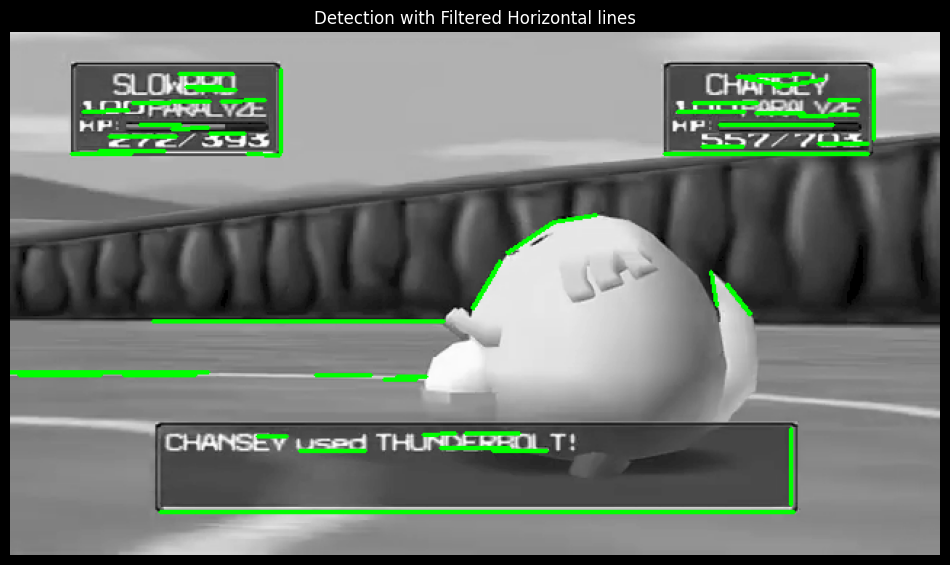

In [16]:
eps=5
# Get all the horizontal lines
horizontal_lines = [line for line in lines_fine if abs(line[0][1] == line[0][3]) < eps]
# For each horizontal line, take out similar lines
horizontal_lines_filtered = []
for line in horizontal_lines:
    existing_line = False
    for other_line in horizontal_lines_filtered:
        if abs(line[0][0] - other_line[0][0]) < eps:
            existing_line = True
            break
    if not existing_line:
        horizontal_lines_filtered.append(line)

img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
for line in horizontal_lines_filtered:
    x1, y1, x2, y2 = line[0] 
    cv2.line(img_color, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green for horizontal
# Display the result
plt.figure(figsize=(12, 16))
plt.title('Detection with Filtered Horizontal lines')
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

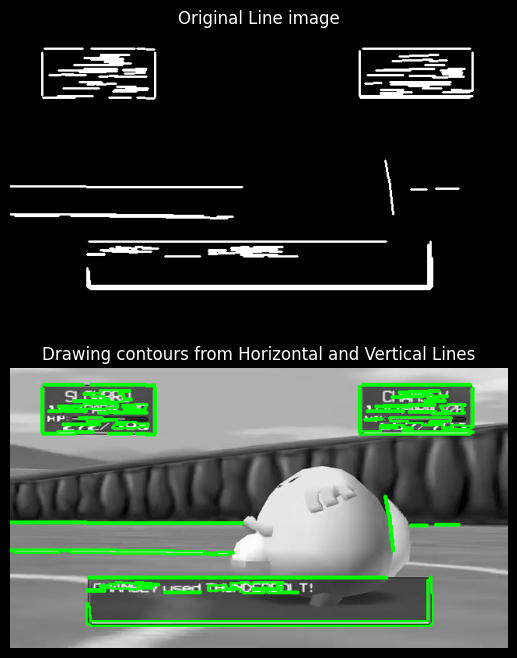

In [17]:
def get_line_img(img, lines_fine):
    line_img = np.zeros_like(img)
    for line in lines_fine:
            x1, y1, x2, y2 = line[0]
            
            # Calculate angle
            if x2 - x1 != 0:
                angle = np.arctan((y2 - y1) / (x2 - x1))
                angle_degrees = np.degrees(angle)
            else:
                angle_degrees = 90  # Vertical line

            if (abs(angle_degrees) > 5 and abs(angle_degrees) < 175) and (abs(angle_degrees - 90) > 15 and abs(angle_degrees + 90) > 15):
                continue # Not using diagonal lines
        
            cv2.line(line_img, (x1, y1), (x2, y2), (255, 255, 255), 2)  # White for all lines
    return line_img

line_img = get_line_img(img, lines_fine)
contours, hierarchy = cv2.findContours(line_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
original_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.drawContours(original_img, contours, -1, (0, 255, 0), 2)  # Draw contours in green

# Display the result
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.title('Original Line image')
plt.imshow(line_img, cmap='gray')
plt.axis('off')
plt.subplot(2, 1, 2)
plt.title('Drawing contours from Horizontal and Vertical Lines')
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
    

In [24]:
HP_BOX_RATIO = 2.3 # Width to height ratio
P1_BOX_RATIO = 1.68
FULL_BOX_RATIO = 1.0 # With pfp and 1P/2P
STATUS_BOX_RATIO = 7.4 # With status bar

# TODO: Determine if P1 or P2 before adjusting HP box location
HP_P_HEIGHT = 0.7 # Height of the HP box relative to the full P1 box
P_P1_LOCATION_V = 0.3 
P_P2_LOCATION_V = 0.0 # Vertical location of the HP box in P1 or P2 box
HP_FULL_HEIGHT = 0.4 # Height of the HP box relative to the full box
FULL_P1_LOCATION_V = 0.2 # Vertical location of the HP box in the full P1 box
FULL_P2_LOCATION_V = 0.40 # Vertical location of the HP box in the full P2 box


HP_LOCATION_IN_BOX = (0.325, 0.825)

def filter_unique_contours(contours, min_iou=0.3):
    # Filter out contours with similar locations and sizes
    unique_contours = []
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        duplicate = False
        for unique_cnt in unique_contours:
            ux, uy, uw, uh = cv2.boundingRect(unique_cnt)
            # Get IoU (Intersection over Union) to check if the contours overlap significantly
            intersection_area = max(0, min(x + w, ux + uw) - max(x, ux)) * max(0, min(y + h, uy + uh) - max(y, uy))
            union_area = (w * h) + (uw * uh) - intersection_area
            iou = intersection_area / union_area if union_area > 0 else 0
            if iou > min_iou:  # If IoU is greater than 0.5, consider it a duplicate
                duplicate = True
                break
        if not duplicate:
            unique_contours.append(cnt)
    return unique_contours

def get_hp_box_location(x, y, w, h, height_ratio, relative_y):
    """
    Calculate the HP box location based on the bounding box of the P1 or P2 box.
    
    Parameters:
    - x, y: Top-left corner of the bounding box
    - w, h: Width and height of the bounding box
    - p1: Boolean indicating if it is P1 (True) or P2 (False)
    
    Returns:
    - hp_box_x, hp_box_y: Coordinates of the HP box location
    """
    hp_box_height = h * height_ratio
    hp_box_width = w 
    hp_box_x = x + int(HP_LOCATION_IN_BOX[0] * hp_box_width)
    hp_box_y = y + int(relative_y * h + HP_LOCATION_IN_BOX[1] * hp_box_height)
    
    return hp_box_x, hp_box_y

def predict_contours(input_img):
    img_gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    normalized_img = cv2.normalize(img_gray, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    # equalized_img = cv2.equalizeHist(normalized_img)
    blurred = cv2.GaussianBlur(normalized_img, (5,5), 1.0)  # Apply median blur to the image
    # Perform Canny edge detection on the input image
    edges = cv2.Canny(blurred, threshold1=120, threshold2=300)

    # Add morphological closing
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    # dilated= cv2.dilate(edges, kernel, iterations=1)
    closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
    closed = cv2.dilate(closed, kernel, iterations=1)
    negative_edges = 255 - closed
    # cv2.GaussianBlur(negative_edges, (5, 5), 0, negative_edges)  # Apply Gaussian blur to the edges image
    
    # Find contours in the edges image
    contours, _ = cv2.findContours(negative_edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours based on area
    img_area = input_img.shape[0] * input_img.shape[1]
    contours_filtered = [cnt for cnt in contours if cv2.contourArea(cnt) > 0.01 * img_area and cv2.contourArea(cnt) < 0.5 * img_area]
    
    img_color = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)
    
    contours_unique = filter_unique_contours(contours_filtered, min_iou=0.3)
    # cv2.drawContours(img_color, contours, -1, (0, 255, 0), 1)  # Draw contours in green
    ratio_shift = 1.0 # Ratio shift to account for different screen sizes or resolutions
    hsv_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2HSV)
    for cnt in contours_unique:
        x, y, w, h = cv2.boundingRect(cnt)
        ratio = w / h
        # Filter any images that intersect with the center of the image
        x_center = input_img.shape[1] // 2
        y_center = input_img.shape[0] // 2
        if (x + w > x_center and x < x_center) and (y + h > y_center and y < y_center):
            continue

        # Determine if P1 or P2 box based on the color of the box
        average_hue = np.median(hsv_img[y:y+h, x:x+w, 0])  # Get average color in BGR 
        # If the box is blue, it is the P1 box
        # P1 will be marked in red colors, P2 in blue colors
        p1 = 1 if average_hue > 100 and average_hue < 180 else 0
        hp = True


        # cv2.rectangle(img_color, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw contours in green
        hp_box_x = 0
        hp_box_y = 0
        if ratio > HP_BOX_RATIO * ratio_shift * 0.95 and ratio < HP_BOX_RATIO * ratio_shift * 1.05: # Draw a rectangle around the HP box
            cv2.rectangle(img_color, (x, y), (x + w, y + h), (255*p1, 0, 255*(1-p1)), 2) 
            # Draw point for HP box location
            hp_box_x, hp_box_y = get_hp_box_location(x, y, w, h, 1.0, 0.0)
        elif ratio > P1_BOX_RATIO * ratio_shift * 0.9 and ratio < P1_BOX_RATIO * ratio_shift * 1.1:
            # Draw a rectangle around the P1 box
            cv2.rectangle(img_color, (x, y), (x + w, y + h), (255*p1, 100, 255*(1-p1)), 2)
            hp_box_x, hp_box_y = get_hp_box_location(x, y, w, h, HP_P_HEIGHT, P_P1_LOCATION_V if p1 else P_P2_LOCATION_V)
        elif ratio > FULL_BOX_RATIO * ratio_shift * 0.9 and ratio < FULL_BOX_RATIO * ratio_shift * 1.1:
            # Draw a rectangle around the full box
            cv2.rectangle(img_color, (x, y), (x + w, y + h), (255*p1, 255, 255*(1-p1)), 2)
            hp_box_x, hp_box_y = get_hp_box_location(x, y, w, h, HP_FULL_HEIGHT, FULL_P1_LOCATION_V if p1 else FULL_P2_LOCATION_V)
        elif ratio > STATUS_BOX_RATIO * ratio_shift * 0.9 and ratio < STATUS_BOX_RATIO * ratio_shift * 1.1:
            # Draw a rectangle around the status box
            cv2.rectangle(img_color, (x, y), (x + w, y + h), (100*p1, 0, 100*(1-p1)), 2) # Red color in BGR
            hp = False
        else:
            hp = False
        if hp:
            cv2.circle(img_color, (hp_box_x, hp_box_y), 5, (255, 0, 255), -1)
    
    # return cv2.cvtColor(negative_edges, cv2.COLOR_GRAY2BGR)
    return img_color

In [25]:
import time
T1 = 200
T2 = 700
PIXEL_RES = 1
ANGLE_RES = np.pi / 180
THRESHOLD = 10
MIN_LINE_LENGTH = 20
MAX_LINE_GAP = 5


# Use Hough LinesP to predict lines in the image
def predict_lines(input_img):
    # Do histogram EQ, find edges
    equalized_img = cv2.equalizeHist(input_img)
    edges = cv2.Canny(equalized_img, threshold1=T1, threshold2=T2)
    # Find lines
    lines = cv2.HoughLinesP(edges, PIXEL_RES, ANGLE_RES, THRESHOLD, minLineLength=MIN_LINE_LENGTH, maxLineGap=MAX_LINE_GAP)
    # Get line image
    line_img = get_line_img(input_img, lines)
    # Find contours
    contours, hierarchy = cv2.findContours(line_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Copy image, draw on it
    original_img = cv2.cvtColor(input_img, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(original_img, contours, -1, (0, 255, 0), 2)  # Draw contours in green
    return original_img

In [26]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import cv2
import os
IMG_DIR= 'C:/Users/tmela/data/battle5'  # Adjust this path as needed

matplotlib.use('TkAgg')  # Use TkAgg backend for interactive plotting
plt.ion()

from matplotlib.animation import FuncAnimation

fig, (ax_img, ax_pred) = plt.subplots(1, 2, figsize=(12, 6))
ax_img.set_title('Image')
ax_pred.set_title('Prediction')
img_img = ax_img.imshow(np.zeros((256, 256)), animated=True)  # Placeholder for image 
img_pred = ax_pred.imshow(np.zeros((256, 256, 3)), animated=True)  # Placeholder for prediction
img_keyword = 'frame' # Adjust this keyword based on your image naming convention
predict = predict_contours  # Use the contour prediction function


def init():
    # Initialize the model and load the best weights
    img_file =  os.path.join(IMG_DIR, f'{img_keyword}_000100.png')  # Adjust this path as needed
    img = cv2.imread(img_file, cv2.IMREAD_COLOR)
    pred = predict(img)  # Get prediction from the model
    img_img.set_array(np.array(img))
    img_pred.set_array(pred)
    return [img_img, img_pred]


def update(i: int):
    # Initialize the model and load the best weights
    img_file =  os.path.join(IMG_DIR, f"{img_keyword}_{i:06d}.png")  # Adjust this path as needed
    img = cv2.imread(img_file, cv2.IMREAD_COLOR)
    # img = cv2.resize(img, (640, 360))  # Resize to match the display size
    img_blurred = cv2.GaussianBlur(img, (5,5), 1.0)  # Apply median blur to the image
    pred = predict(img)
    img_img.set_array(cv2.cvtColor(img_blurred, cv2.COLOR_BGR2RGB))  # Convert grayscale to BGR for display
    img_pred.set_array(pred)
    return [img_img, img_pred]

plt.tight_layout()
ani = FuncAnimation(fig, update, frames=range(100, 3000, 3), init_func=init, repeat=True, interval=100, blit=True)
# Save the animation as a video file
# ani.save('example.mp4', writer='ffmpeg', fps=30, dpi=300)
plt.show(block=True)